<h4><b>Data Science & Business Analytics Internship at The Sparks Foundation</b></h4>

<h4><b>Name - Aditya Dixit</b></h4>
<hr>
<h2>Task 2: Prediction using Unsupervised ML<h2>
<hr>

<h4><b>Problem statement:</b> From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.<h4>

Dataset Link - https://bit.ly/3kXTdox

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
#importing the dataset
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#checking for any null or missing values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#dropping the extra columns of ID
df.drop(['Id'],inplace=True,axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x = df.iloc[:,0:4].values

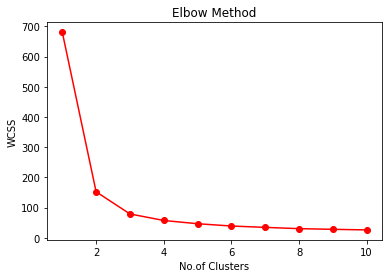

In [ ]:
#Now finding the optimum number of clusters using the Elbow Method
#WCSS Stands for the sum of the squares of distances of the data points in each 
#and every cluster from its centroid.

wcss = []  #Within-Cluster-Sum-of-Squares is used to find the right number of clusters to use

for i in range(1,11):
  kmeans_model = KMeans(n_clusters=i,init='k-means++')
  kmeans_model.fit(x)
  wcss.append(kmeans_model.inertia_)

#Now plotting the Elbow graph to find the right number of clusters to use - 

plt.plot(range(1,11),wcss,c='red',marker='o')
plt.title('Elbow Method')
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')
plt.show()

<h4>Applying K-Means algorithm

In [ ]:
#Applying Kmeans Algorithm with 3 clusters
kmeans_model = KMeans(n_clusters=3,init='k-means++')
cluster_output = kmeans_model.fit_predict(x)
cluster_output

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
#printing the cluster centers
centroids = kmeans_model.cluster_centers_
print(centroids)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


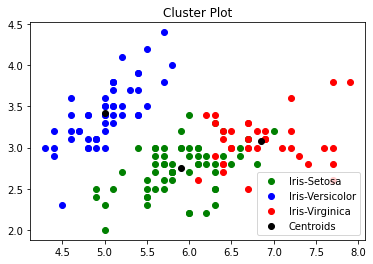

In [ ]:
#plotting the clusters
plt.scatter(x[cluster_output == 0,0], x[cluster_output == 0,1], label='Iris-Setosa',c='green')
plt.scatter(x[cluster_output == 1,0], x[cluster_output == 1,1], label='Iris-Versicolor',c='blue')
plt.scatter(x[cluster_output == 2,0], x[cluster_output == 2,1], label='Iris-Virginica',c='red')
plt.title('Cluster Plot')
plt.scatter(centroids[:,0], centroids[:,1], label='Centroids',c='black')
plt.legend()
plt.show()